# Introduction to Regression with neural networks in TensorFlow

A simple way to define regression is: predicting a numerical variable based on some other combination of variables. In short, predicting a number

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit

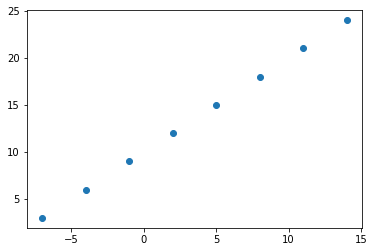

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize the data
plt.scatter(X, y);

In [4]:
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo data for our housing price problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937000])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [7]:
# Turn our numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compiling the model** - define loss function (in other words, the function which tells how wrong our model is) and optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model to find patterns between X and y (feaures and labels).

In [9]:
# Set the random seed
tf.random.set_seed = 42

# 1. Creating a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling our model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 561ms/step - loss: 21.5702 - mae: 21.5702
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 21.1771 - mae: 21.1771
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 20.7840 - mae: 20.7840
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 20.4234 - mae: 20.4234
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 20.1421 - mae: 20.1421


In [10]:
#  Try and make a prediction with our trained model
y_pred = model.predict([17.0])
y_pred

array([[-23.068537]], dtype=float32)

## Improving our model

We can improve a model by altering the steps we took in creating the model.

1. **Creating model** - Here we can add more layers, increase the number of hidden units(neurons), also change the activation function in each layer.
2. **Compiling model** - Here we might change the optimizer function or change the learning rate of the optimization function.
3. **Fitting model** - Here we might fit the model with more epochs or give the model more data 

In [11]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 257ms/step - loss: 15.6074 - mae: 15.6074
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 15.3262 - mae: 15.3262
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 15.0449 - mae: 15.0449
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.8312 - mae: 14.8312
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 14.6987 - mae: 14.6987
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 14.5662 - mae: 14.5662
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 14.4337 - mae: 14.4337
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 14.3012 - mae: 14.3012
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 14.1687 - mae: 14.1687
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 14.0362 - mae: 14.0362
Epoch 11/100
1/1 [==============================] - 0s 7

In [12]:
# Let's see the prediction of new model
model.predict([17.0])

array([[29.427305]], dtype=float32)

In [13]:
# Let's try to change one more parameter

# 1. Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 400ms/step - loss: 12.3635 - mae: 12.3635
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.6681 - mae: 11.6681
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9663 - mae: 10.9663
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2560 - mae: 10.2560
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.5344 - mae: 9.5344
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7981 - mae: 8.7981
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.0438 - mae: 8.0438
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2685 - mae: 7.2685
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8251 - mae: 6.8251
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0337 - mae: 7.0337
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - los

In [14]:
# Let's see the prediction again
model.predict([17.0])

array([[27.357454]], dtype=float32)

## Evaluating a model

A typical workflow in building a neural network model is:

```
Build a model -> fit it -> evaluate it -> tweak a model ->
evaluate it ->  ... 
``` 

In [15]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
# Make labels for the data
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

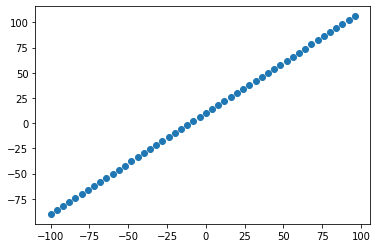

In [17]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* Training set - This is the set from which the model learns, typically 70-80% of the data.
* Validation set - In this set the model gets tuned, typically 10-15% of the data.
* Test set - In this set the model gets evaluated, typically 10-15% of the data.

In [18]:
# Check the number of samples
len(X)

50

In [19]:
# Split the data into train and test sets
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

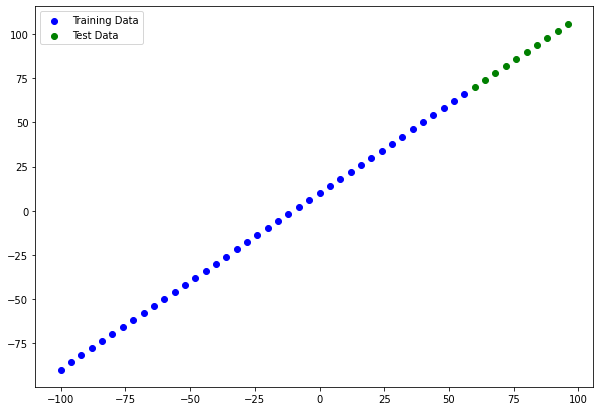

In [20]:
### Visualizing the data
plt.figure(figsize=(10, 7))

# Plot trainig data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")

# Show legend
plt.legend();

In [21]:
# Let's build another neural network for our new data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [22]:
# model.summary()

In [23]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed = 42

# Build a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(10, name="hidden_layer_1"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="first_model")

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=.01),
              metrics=["mae"])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
model.summary()

Model: "first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) a model can update as it trains.
* Non-trainable params - these parameters aren't updated during training.

In [25]:
# Let's fit our model with the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [26]:
# Get our model summary
model.summary()

Model: "first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


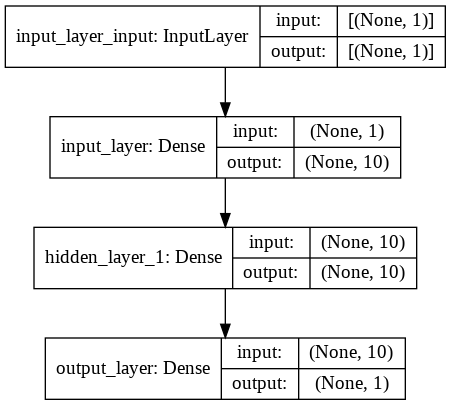

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing models prediction

In [28]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([[ 69.18848 ],
       [ 73.13339 ],
       [ 77.0783  ],
       [ 81.023224],
       [ 84.96814 ],
       [ 88.913055],
       [ 92.857956],
       [ 96.80288 ],
       [100.7478  ],
       [104.69271 ]], dtype=float32)

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [30]:
# Let's create a plotting function

def plot_predictions(train_data=X_train, train_label=y_train,
                     test_data=X_test, test_label=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", label="Test Data")

  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show legend
  plt.legend()

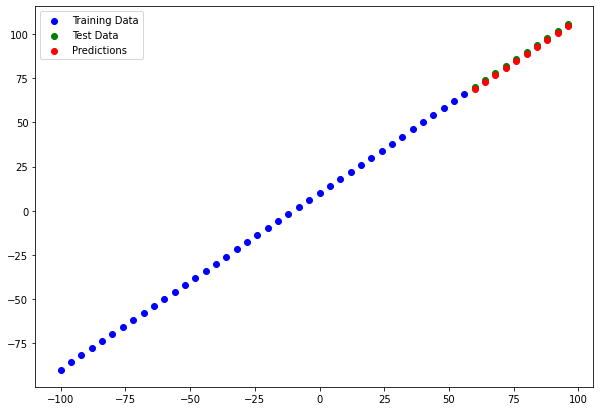

In [31]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluating our model's prediction with evaluation metrics

In [32]:
# Evaluate the model on test data
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 1.0594 - mae: 1.0594


[1.0594024658203125, 1.0594024658203125]

In [35]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test, tf.constant(tf.squeeze(y_pred)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.0594063>

In [38]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_test, tf.constant(tf.squeeze(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.1473751>

### Running experiments to improve our model

#### Build a model with 1 layer and 100 epochs

In [39]:
# Set random seed
tf.random.set_seed=42

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 26.0780 - mae: 26.0780
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 8.2973 - mae: 8.2973
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 10.3616 - mae: 10.3616
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 7.7912 - mae: 7.7912
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1410 - mae: 12.1410
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 18.0346 - mae: 18.0346
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5520 - mae: 9.5520
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 10.4315 - mae: 10.4315
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 16.4075 - mae: 16.4075
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1379 - mae: 12.1379
Epoch 11/100
2/2 [==============================] - 0s 3ms/step -

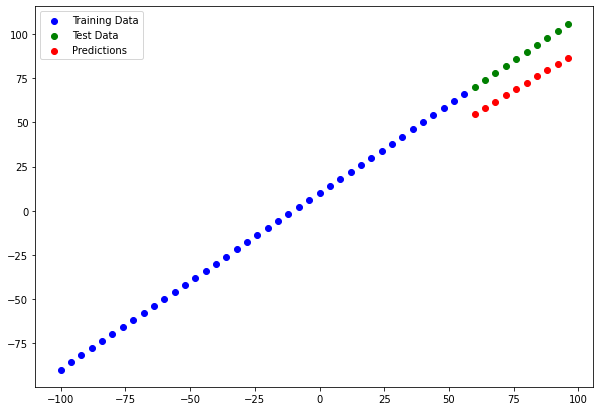

In [40]:
# Make predictions and plot predictions
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [41]:
# Calculate model_1 evaluation
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_1))
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=17.27472>,
 <tf.Tensor: shape=(), dtype=float32, numpy=300.02484>)

#### Build model with 2 layers and 100 epochs

In [45]:
# Set random seed
tf.random.set_seed = 42

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

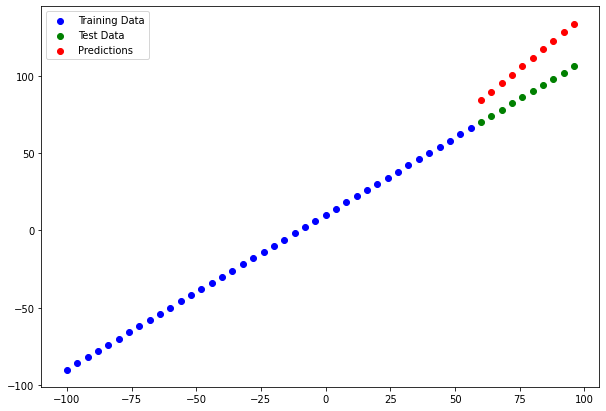

In [46]:
# Make predictions and plot predictions
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [47]:
# Calculate model_2 evaluation
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=20.94144>,
 <tf.Tensor: shape=(), dtype=float32, numpy=456.9501>)

### Comparing results of our experiments

In [51]:
# Let's compare our model results with Pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

all_results

,model,mae,mse
0,model_1,17.274719,300.024841
1,model_2,20.941441,456.950104


## Saving our model

Saving models allows us to use them in future use.

There are two formats in which we can save our model.
1. The SavedModel format
2. HDF5 format.

In [52]:
# Save model using SavedModel format
model.save("best_model_saved_model")

INFO:tensorflow:Assets written to: best_model_saved_model/assets


In [53]:
# Save model using HDF5 format
model.save('best_model_hdf5.h5')

## Loading in a saved model

In [54]:
# Load in saved model format
loaded_saved_model = tf.keras.models.load_model("best_model_saved_model")
loaded_saved_model.summary()

Model: "first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


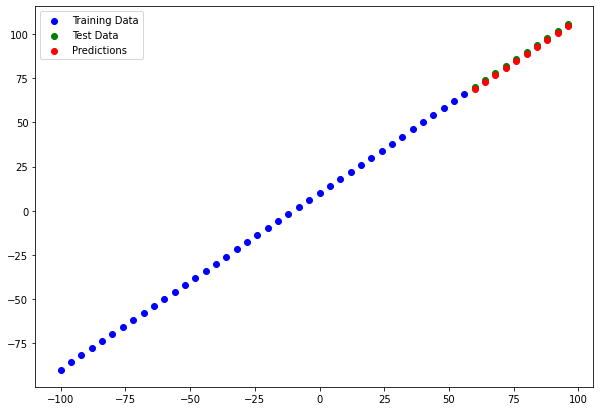

In [55]:
y_pred_saved_model = loaded_saved_model.predict(X_test)
plot_predictions(predictions=y_pred_saved_model)

In [56]:
y_pred == y_pred_saved_model

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [57]:
# Load in hdf5 format model
loaded_h5_model = tf.keras.models.load_model('best_model_hdf5.h5')
loaded_saved_model.summary()

Model: "first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Download a file from google colab
from google.colab import files
files.download("/content/best_model_hdf5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>